In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import pandas as pd
import os
import warnings

os.getcwd()

'/Users/Jill/Documents/Web Analysis/CA1/web_analytics'

In [4]:
# load data
union = pd.read_csv('./RecSys/data_cleaned/cleaned_data.csv')
union.head()

,Unnamed: 0,sessionID,ts,itemID,cat,status
0,0,4882323,2014-06-23T19:44:36.632Z,214578326,1,0
1,1,4882323,2014-06-23T19:48:43.600Z,214695011,1,0
2,2,4882323,2014-06-23T19:49:20.872Z,214696442,1,0
3,3,4882323,2014-06-23T19:46:07.853Z,214716956,1,0
4,4,4882323,2014-06-23T19:44:35.305Z,214717271,1,0


In [5]:
# ts to datetime
union['ts']=pd.to_datetime(union.ts)
union['hour']=union.ts.dt.hour
union['weekday']=union['ts'].dt.dayofweek.astype(int)+1
union.head()

,Unnamed: 0,sessionID,ts,itemID,cat,status,hour,weekday
0,0,4882323,2014-06-23 19:44:36.632,214578326,1,0,19,1
1,1,4882323,2014-06-23 19:48:43.600,214695011,1,0,19,1
2,2,4882323,2014-06-23 19:49:20.872,214696442,1,0,19,1
3,3,4882323,2014-06-23 19:46:07.853,214716956,1,0,19,1
4,4,4882323,2014-06-23 19:44:35.305,214717271,1,0,19,1


In [6]:
# Buy ratio averaged for hour
hour_info=union.groupby(['hour','status'])['sessionID'].nunique().reset_index(name='count')
hour_click=hour_info[hour_info['status']==0]
hour_buy=hour_info[hour_info['status']==1]
hour_info=pd.merge(hour_click,hour_buy,on='hour')
hour_info['ratio']= round((hour_info['count_y']/hour_info['count_x']) *100, 2)

In [7]:
# Buy ratio averaged for weekday
weekday_info=union.groupby(['weekday','status'])['sessionID'].nunique().reset_index(name='count')
weekday_click=weekday_info[weekday_info['status']==0]
weekday_buy=weekday_info[weekday_info['status']==1]
weekday_info=pd.merge(weekday_click,weekday_buy,on='weekday')
weekday_info['ratio']=round((weekday_info.count_y/weekday_info.count_x) *100, 2)
weekday_info['ratio']

0    5.50
1    1.94
2    4.85
3    5.22
4    5.72
5    7.81
6    6.40
Name: ratio, dtype: float64

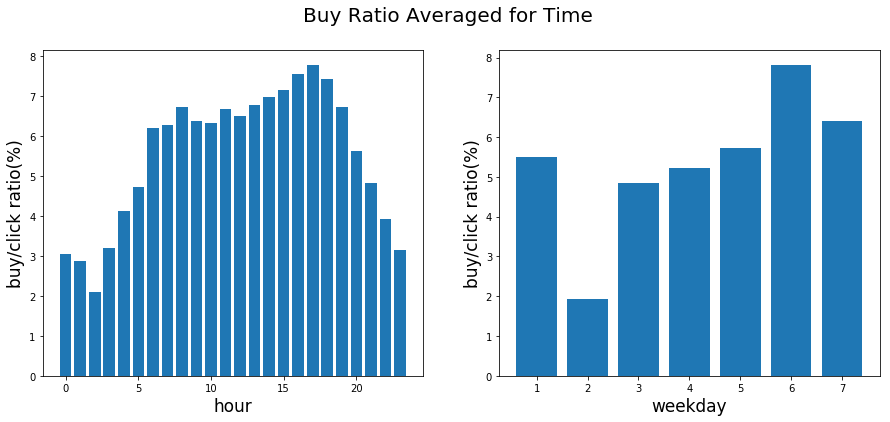

In [8]:
fig = plt.figure(figsize=(15,6))
fig.suptitle('Buy Ratio Averaged for Time', fontsize=20)

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# ax1.scatter(hour_info['hour'],hour_info['ratio'])
ax1.bar(hour_info['hour'],hour_info['ratio'])
ax1.set_xlabel('hour', fontsize=17)
ax1.set_ylabel('buy/click ratio(%)', fontsize=17)
# ax2.scatter(weekday_info['weekday'],weekday_info['ratio'])
ax2.bar(weekday_info['weekday'],weekday_info['ratio'])
ax2.set_xlabel('weekday', fontsize=17)
ax2.set_ylabel('buy/click ratio(%)', fontsize=17)
plt.show()

In [9]:
# Buy Ratio Averaged for Category
def cat_classfier(value):
    if value=='S':
        return '13'
    elif len(value)<=2:
        return value
    else:
        return '14'

In [10]:
union['cat']=union.cat.astype(str).apply(cat_classfier).astype(int)
cat_info=union.groupby(['cat','status'])['sessionID'].nunique().reset_index(name='count').sort_values(by='cat')
cat_click=cat_info[cat_info['status']==0]
cat_buy=cat_info[cat_info['status']==1]
cat_info=pd.merge(cat_click,cat_buy,on='cat')
cat_info['ratio']=round((cat_info.count_y/cat_info.count_x)*100, 2)

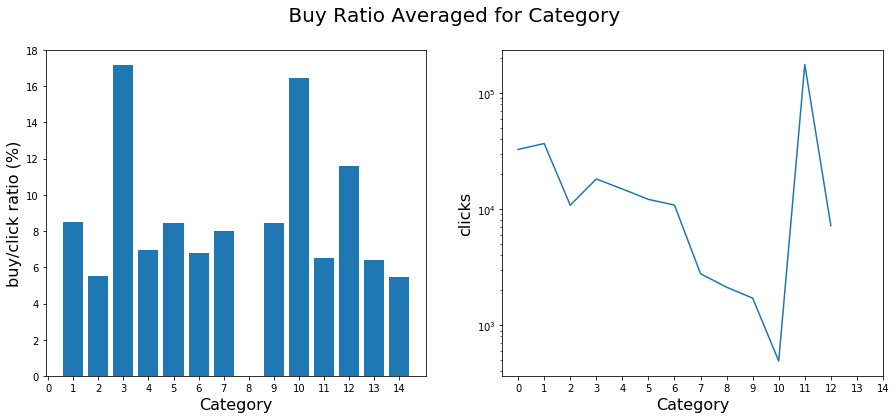

<Figure size 576x288 with 0 Axes>

In [12]:
fig = plt.figure(figsize=(15,6))
fig.suptitle(' Buy Ratio Averaged for Category', fontsize=20)

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)


fig = plt.figure(figsize=(8,4))
# plt.plot(cat_info.count_y)
#ax1.scatter(cat_info.cat,cat_info.ratio,color='b')
ax1.bar(cat_info.cat,cat_info.ratio)
ax1.set_xticks(range(0,15))
ax1.set_ylim(0.02)
ax1.set_ylabel('buy/click ratio (%)',fontsize=16)
ax1.set_xlabel('Category',fontsize=16)

ax2.plot(cat_info.count_x)
ax2.set_yscale('log')
ax2.set_ylabel('clicks',fontsize=16)
ax2.set_xticks(range(0,15))
ax2.set_xlabel('Category',fontsize=16)

plt.show()

In [14]:
# Buy Ratio Averaged for Category Number
cat=union[['sessionID','cat','status']]
cat_num=cat.groupby('sessionID')['cat'].nunique().reset_index(name='cat_num')
session_status=cat.groupby('sessionID')['status'].max().reset_index(name='status')
cat_info=pd.merge(cat_num,session_status,on='sessionID')

In [15]:
cat_buys=cat_info.groupby('cat_num')['status'].sum().reset_index(name='buys')
cat_nums=cat_info.groupby('cat_num')['status'].count().reset_index(name='session_nums')
cat_aggr=pd.merge(cat_buys,cat_nums,on='cat_num')
cat_aggr['ratio']=round((cat_aggr.buys/cat_aggr.session_nums)*100,2)

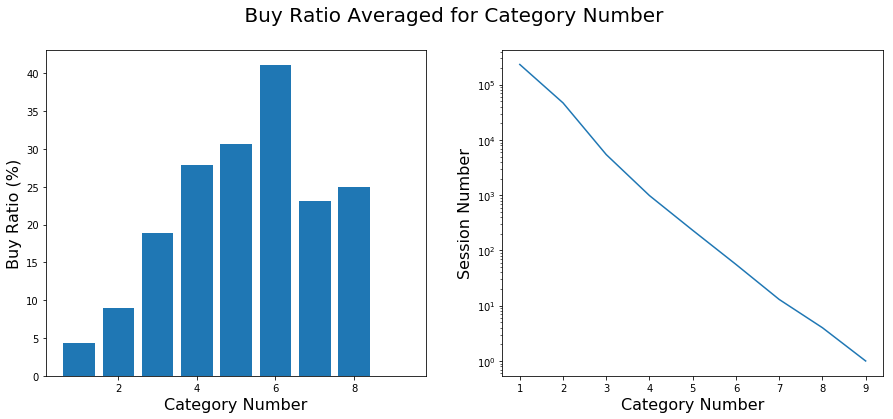

<Figure size 576x288 with 0 Axes>

In [17]:
fig = plt.figure(figsize=(15,6))
fig.suptitle(' Buy Ratio Averaged for Category Number', fontsize=20)

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)


fig = plt.figure(figsize=(8,4))
# ax1.scatter(cat_aggr.cat_num,cat_aggr.ratio)
ax1.bar(cat_aggr.cat_num,cat_aggr.ratio)
ax1.set_ylim(0.02)
ax1.set_ylabel('Buy Ratio (%)',fontsize=16)
ax1.set_xlabel('Category Number',fontsize=16)


ax2.plot(cat_aggr.cat_num,cat_aggr.session_nums)
ax2.set_yscale('log')
ax2.set_ylabel('Session Number',fontsize=16)
ax2.set_xlabel('Category Number',fontsize=16)

plt.show()

In [80]:
# Buy Ratio Averaged for Session Length
session_length=union.groupby('sessionID')['status'].count().reset_index(name='length')
session_length=pd.merge(session_status,session_length,on='sessionID')

In [81]:
len_buys=session_length.groupby('length')['status'].sum().reset_index(name='buys')
len_num=session_length.groupby('length')['status'].count().reset_index(name='len_num')
len_aggr=pd.merge(len_buys,len_num,on='length')

In [82]:
len_aggr['ratio']= round((len_aggr.buys/len_aggr.len_num)*100, 2)

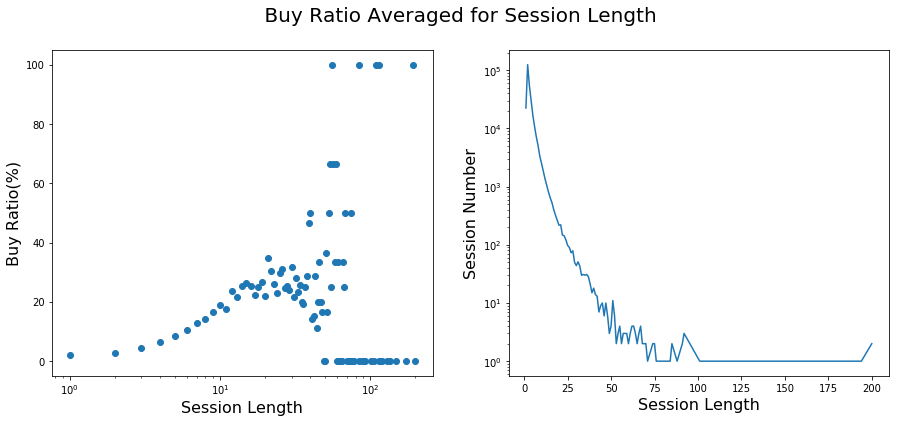

<Figure size 576x288 with 0 Axes>

In [85]:
fig = plt.figure(figsize=(15,6))
fig.suptitle(' Buy Ratio Averaged for Session Length', fontsize=20)

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)


fig = plt.figure(figsize=(8,4))
ax1.scatter(len_aggr.length,len_aggr.ratio)
ax1.set_ylabel('Buy Ratio(%)',fontsize=16)
ax1.set_xlabel('Session Length',fontsize=16)
ax1.set_xscale('log')

ax2.plot(len_aggr.length,len_aggr.len_num)
ax2.set_yscale('log')
#ax2.set_xscale('log')
ax2.set_ylabel('Session Number',fontsize=16)
ax2.set_xlabel('Session Length',fontsize=16)


plt.show()

In [87]:
# Buy Ratio Averaged for Dwell Time
dwell_max=union.groupby('sessionID')['ts'].max().reset_index(name='max')
dwell_min=union.groupby('sessionID')['ts'].min().reset_index(name='min')

session_dwell=pd.merge(dwell_max,dwell_min,on='sessionID')
session_dwell['dwell']=(session_dwell['max']-session_dwell['min']).astype('timedelta64[m]')
session_dwell.head()
session_dwell=pd.merge(session_dwell,session_status,on='sessionID')

In [91]:
dwell_buys=session_dwell.groupby('dwell')['status'].sum().reset_index(name='buys')
dwell_num=session_dwell.groupby('dwell')['status'].count().reset_index(name='dwell_num')
dwell_aggr=pd.merge(dwell_buys,dwell_num,on='dwell')
dwell_aggr['ratio']= round((dwell_aggr.buys/dwell_aggr.dwell_num)*100, 2)

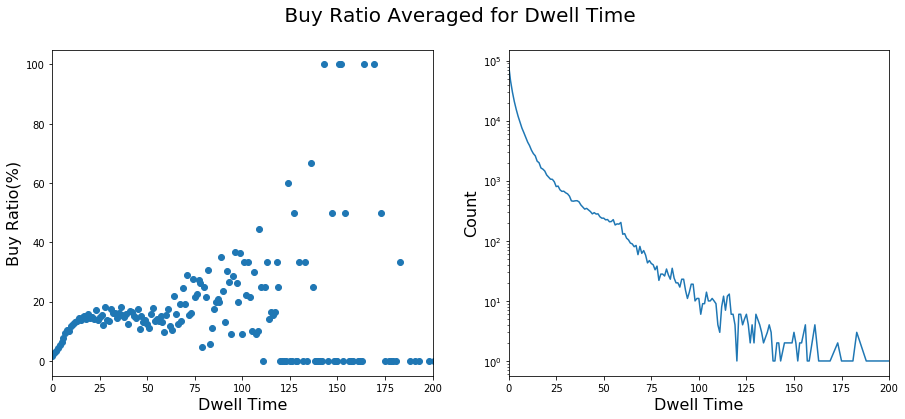

<Figure size 576x288 with 0 Axes>

In [93]:
fig = plt.figure(figsize=(15,6))
fig.suptitle(' Buy Ratio Averaged for Dwell Time', fontsize=20)

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)


fig = plt.figure(figsize=(8,4))
ax1.scatter(dwell_aggr.dwell,dwell_aggr.ratio)
ax1.set_ylabel('Buy Ratio(%)',fontsize=16)
ax1.set_xlabel('Dwell Time',fontsize=16)
# ax1.set_xscale('log')
ax1.set_xlim(0,200)


ax2.plot(dwell_aggr.dwell,dwell_aggr.dwell_num)
ax2.set_yscale('log')
#ax2.set_xscale('log')
ax2.set_ylabel('Count',fontsize=16)
ax2.set_xlabel('Dwell Time',fontsize=16)
ax2.set_xlim(0,200)

plt.show()
